# Binomial Distribution

- **Definition**: Probability distribution of the number of successes in `n` independent Bernoulli trials.
- **Conditions**:
  1. Fixed number of trials `n`.
  2. Each trial has two outcomes: success/failure.
  3. Probability of success `p` is constant.
  4. Trials are independent.

- **Formula (PMF)**:
  P(X = k) = nCk * p^k * (1-p)^(n-k)

- **Mean**: μ = n * p  
- **Variance**: σ² = n * p * (1 - p)

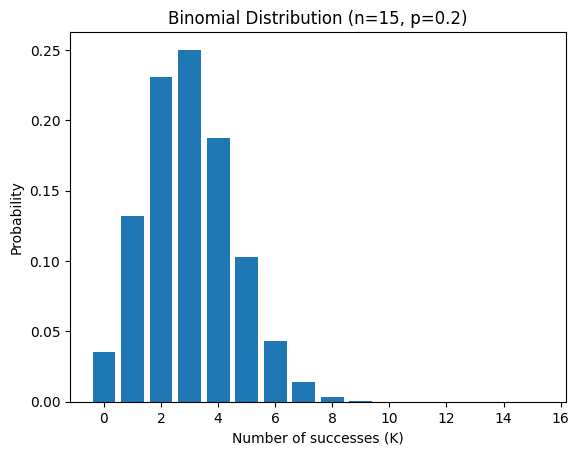

In [4]:
n , p = 15 , 0.2 

from scipy.stats import binom
import matplotlib.pyplot as plt


sales  = binom.rvs(n, p, size=100)

n, p = 15, 0.2
x = range(n+1)   # possible number of successes (0 to n)
plt.bar(x, binom.pmf(x, n, 0.2))   # PMF for each number of successes
plt.title("Binomial Distribution (n=15, p=0.2)") 
plt.xlabel("Number of successes (K)")
plt.ylabel("Probability")
plt.show()

### 🎯 Practice Questions
1. A basketball player has a **60% chance** of hitting a free throw.  
   If she shoots **10 times**, what’s the probability she scores exactly 7 baskets?


In [5]:
n , p , k = 10 , 0.6 , 7

prob = binom.pmf(k, n, p)
print(f"The probability of exactly {k} successes in {n} trials with success probability {p} is: {prob:.4f}")

The probability of exactly 7 successes in 10 trials with success probability 0.6 is: 0.2150


# Poisson Distribution

- **Definition** : Distribution of the number of events happening in a fixed interval (time/space) when events occur independently at a constant average rate 𝜆.

- **Conditions** :
 1. Events are discrete counts (0,1,2,...).

 2. Events occur independently.

 3. The average rate λ is constant over intervals.

 4. Probability of two events occurring at exactly the same instant is negligible.

- **Formula (PMF)** :

  𝑃(𝑋=𝑘) = 𝑒^−𝜆 * 𝜆^𝑘 / 𝑘!



- **Mean & Variance** :

E[X] = λ, Var(X) = λ

(mean equals variance — key diagnostic)

In [6]:
from scipy.stats import poisson

_lambda = 4

visits = poisson.rvs(_lambda, size=100)

visits

array([4, 4, 4, 2, 3, 2, 6, 2, 5, 4, 5, 3, 5, 2, 4, 3, 5, 3, 6, 8, 6, 7,
       2, 6, 1, 5, 4, 2, 1, 3, 2, 4, 4, 6, 2, 5, 6, 1, 5, 2, 7, 7, 1, 2,
       8, 2, 4, 5, 5, 2, 5, 0, 7, 1, 3, 6, 2, 4, 0, 4, 3, 3, 3, 7, 0, 0,
       8, 2, 1, 6, 3, 5, 4, 2, 5, 2, 5, 3, 3, 2, 4, 3, 4, 0, 4, 5, 3, 5,
       2, 4, 6, 6, 3, 5, 3, 1, 9, 6, 4, 3])

In [7]:
visits.max()

np.int64(9)

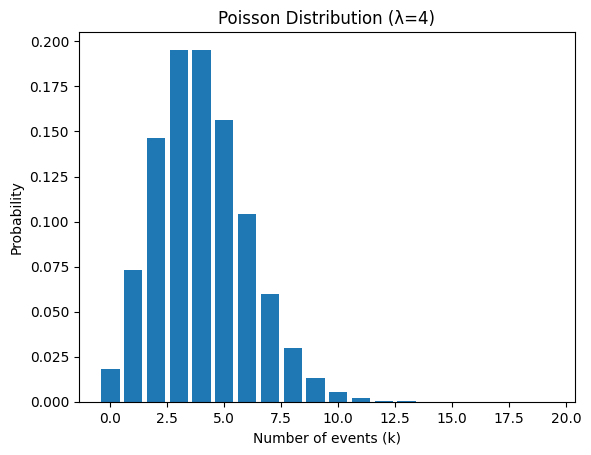

In [8]:
range(20)

plt.bar(range(20), poisson.pmf(range(20), _lambda))
plt.title("Poisson Distribution (λ=4)")
plt.xlabel("Number of events (k)")
plt.ylabel("Probability")
plt.show()

🎯 Practice Questions

If a call center receives on average λ = 2 calls/hour, what’s the probability of receiving exactly 5 calls in one hour? (Use PMF.)

In [9]:
_lambda = 2

k =5 

prob = poisson.pmf(k, _lambda)
print(f"The probability of observing exactly {k} events when the average rate is {_lambda} is: {prob:.4f}")

The probability of observing exactly 5 events when the average rate is 2 is: 0.0361


# Exponential Distribution

- 1. **Definition**:

- The Exponential Distribution models the time between two consecutive events in a Poisson process.

- If events occur at a constant average rate λ, exponential distribution gives the probability of waiting time t until
 the next event happens.

- 👉 Poisson answers: “How many events will occur in a fixed interval?”
- 👉 Exponential answers: “How long until the next event occurs?”

2. **PDF (Probability Density Function)**:

- 𝑓(𝑡;𝜆) = 𝜆𝑒−𝜆𝑡,  𝑡≥0

- λ = average rate (events per unit time)

- t = time until next event

🔹 Notice it’s a PDF, not PMF, because time is continuous.

3. **CDF (Cumulative Distribution Function)**:

- F(t) = P(T≤t)= 1−e^−λt

- This gives the probability that the event happens within t units of time.

4. **Properties**:

- Mean = 1/𝜆
	​
- Variance = 1/𝜆^2

In [10]:
from scipy.stats import expon

In [11]:
rate_per_minute = 3
rate_per_second = rate_per_minute / 60
scale = 1 / rate_per_second

In [12]:
# NUMBER OF EVENTS FOR WHICH INTERVAL IS 60 SECONDS IS very  few 

# Compared to NUMBER OF EVENTS FOR WHICH INTERVAL IS 0 SECONDS

In [13]:
import numpy as np
x = np.linspace(0, 60, 60) # we want to plot from 0 to 60 seconds
# 500 is for smooth curve

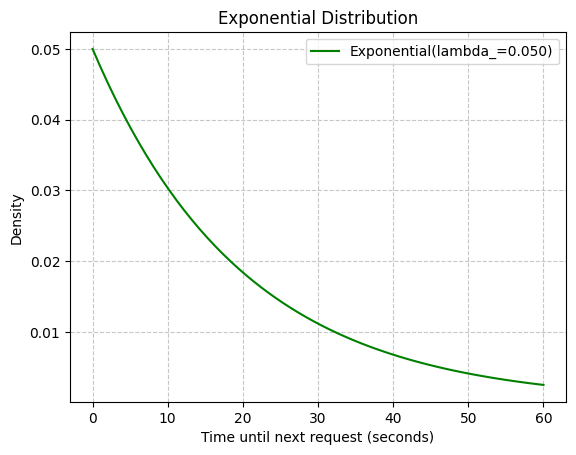

In [14]:
y = expon.pdf(x,scale=scale)

plt.plot(x, y, color='green', label=f'Exponential(lambda_={rate_per_second:.3f})')
plt.title("Exponential Distribution")
plt.xlabel("Time until next request (seconds)")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [15]:
prob = expon.cdf(10, scale=scale)
print(prob)

0.3934693402873666


# Normal distribution 

1. **Intuition**:

- Normal Distribution is different from the earlier ones:

- Binomial/Poisson → count number of events.

- Exponential → time until next event.

- Normal → deals with continuous values around a mean (average).

- Think about heights of students in your class. Not everyone is exactly 170 cm, but most are around it. Some are taller, some shorter. If you plot them, you get a bell curve.

2. **Formula**:

- The PDF (probability density function) is:

- μ = mean (center of the curve).

- σ = standard deviation (spread).

- x = value we want probability density for.

3. **Key Idea** :

- Mean (µ) → where the peak is.

- Standard deviation (σ) → how wide the curve is.

- About 68% of values fall within 1σ of the mean, 95% within 2σ, and 99.7% within 3σ (the "68–95–99.7 rule").

In [16]:
from scipy.stats import norm

In [17]:
mu, sigma = 3, 1
x = np.linspace(1, 5, 100)


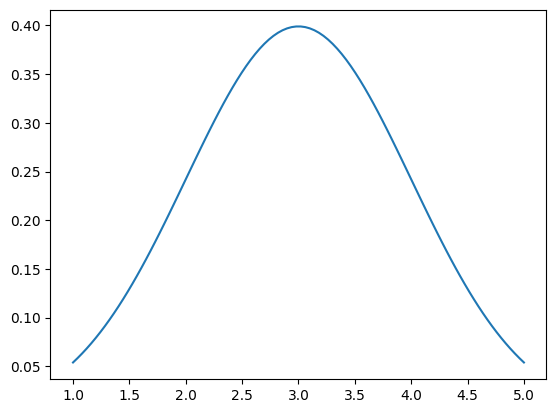

In [18]:
plt.plot(x, norm.pdf(x, mu, sigma))

In [19]:
prob = norm.cdf(190, 170, 10) - norm.cdf(150, 170, 10)

In [20]:
print(prob)

0.9544997361036416


In [21]:
prob = norm.cdf(180, 170, 10) - norm.cdf(160, 170, 10)
print(prob)


0.6826894921370859
